# YourCabs Analysis Model selection

### Description
- ### Business problem tackled here is trying to improve customer service for YourCabs.com, a cab company in Bangalore.
- ### The problem of interest is booking cancellations by the company due to unavailability of a car. The challenge is that cancellations can occur very close to the trip start time, thereby causing passengers inconvenience.

### Goal
- ### The goal of the competition is to create a predictive model for classifying new bookings as to whether they will eventually gets cancelled due to car unavailability.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Travel ID - 1

In [2]:
cwd = os.path.dirname(os.getcwd())
data_path_1 = os.path.join(cwd,'data','travel_id_1.csv')
ld = pd.read_csv(data_path_1)

### Changing dtypes

In [3]:
# Changing the column dtypes to object
ld[['id','user_id','vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id',
                                       'from_city_id','to_city_id','online_booking','hour_of_departure',
                                       'mobile_site_booking','from_lat','from_long','to_lat','to_long','season','day_of_departure',
                                       'area_cancel_per','Car_Cancellation']] = ld[['id','user_id','vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id',
                                       'from_city_id','to_city_id','online_booking','hour_of_departure',
                                       'mobile_site_booking','from_lat','from_long','to_lat','to_long','season','day_of_departure',
                                       'area_cancel_per','Car_Cancellation']].astype('object')

# Changing the date to date column to appropiate data type
ld[['from_date','booking_created']] = ld[['from_date','booking_created']].astype('datetime64[s]')
ld['to_date'] = ld['to_date'].astype('datetime64[s]')

ld['gap_hours'] = ld['gap_hours'].astype('float32')

### Counting number of missing values for each field

In [4]:
ld.isna().sum()

id                        0
user_id                   0
vehicle_model_id          0
package_id             1589
travel_type_id            0
from_area_id             88
to_area_id             1588
from_city_id            196
to_city_id                1
from_date                 0
to_date                  85
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 1588
to_long                1588
Car_Cancellation          0
season                    0
day_of_departure          0
hour_of_departure         0
gap_hours                 0
area_cancel_per           0
dtype: int64

### Checking Value count of Target variable

In [5]:
ld.Car_Cancellation.value_counts(dropna=False)

Car_Cancellation
0    1568
1      21
Name: count, dtype: int64

### Checking number of unique values of each feature

In [6]:
ld.nunique(dropna=False)

id                     1589
user_id                1413
vehicle_model_id         18
package_id                1
travel_type_id            1
from_area_id            298
to_area_id                2
from_city_id              4
to_city_id              117
from_date              1288
to_date                 676
online_booking            2
mobile_site_booking       2
booking_created        1586
from_lat                250
from_long               250
to_lat                    2
to_long                   2
Car_Cancellation          2
season                    4
day_of_departure          7
hour_of_departure         4
gap_hours              1267
area_cancel_per           5
dtype: int64

### Dropping Columns

In [7]:
ld.drop(columns=['id','user_id','package_id','travel_type_id','from_area_id','to_area_id','from_date','to_date','booking_created','to_lat','to_long','from_lat','from_long'],inplace=True)

In [8]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     1589 non-null   object 
 1   from_city_id         1393 non-null   object 
 2   to_city_id           1588 non-null   object 
 3   online_booking       1589 non-null   object 
 4   mobile_site_booking  1589 non-null   object 
 5   Car_Cancellation     1589 non-null   object 
 6   season               1589 non-null   object 
 7   day_of_departure     1589 non-null   object 
 8   hour_of_departure    1589 non-null   object 
 9   gap_hours            1589 non-null   float32
 10  area_cancel_per      1589 non-null   object 
dtypes: float32(1), object(10)
memory usage: 130.5+ KB



### Plotting the percentage of occurance of values in each object column

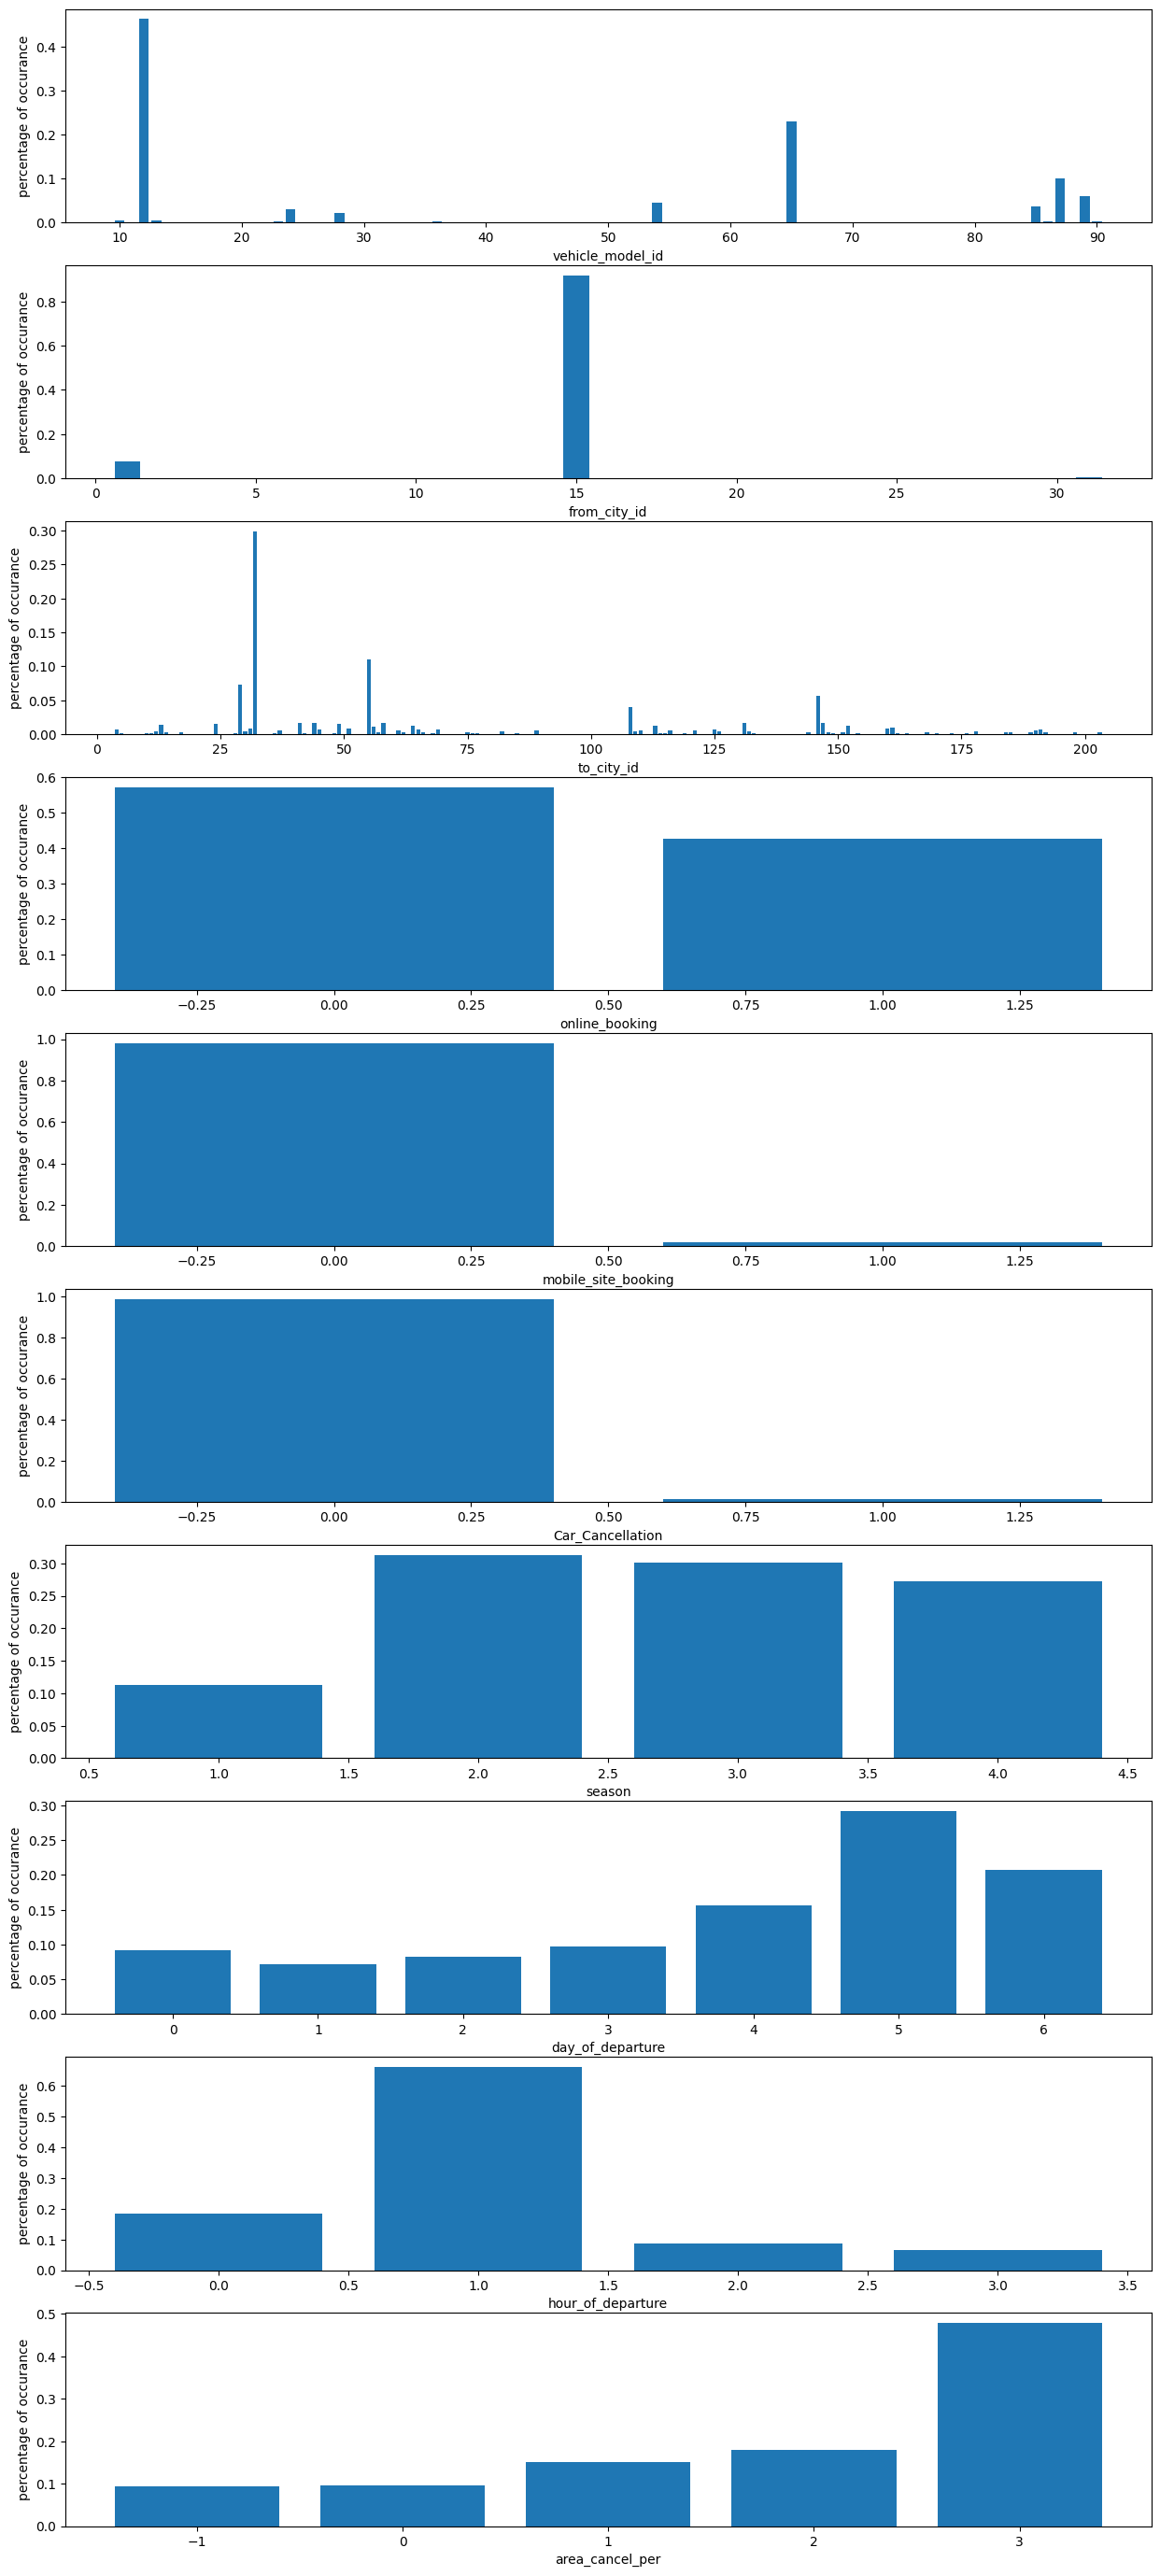

In [9]:
obj_cols = ld.select_dtypes('object').columns

i=0
fig,ax = plt.subplots(10,1)
for i in range(10):
    ax[i].bar(x=ld[obj_cols[i]].value_counts(normalize=True,dropna=True).keys(),height=ld[obj_cols[i]].value_counts(normalize=True,dropna=True).values)
    ax[i].set_xlabel(obj_cols[i])
    ax[i].set_ylabel('percentage of occurance')

    i+=1
    
fig.set_size_inches(15,35)

### Distribution of Numeric columns

Text(0, 0.5, 'count')

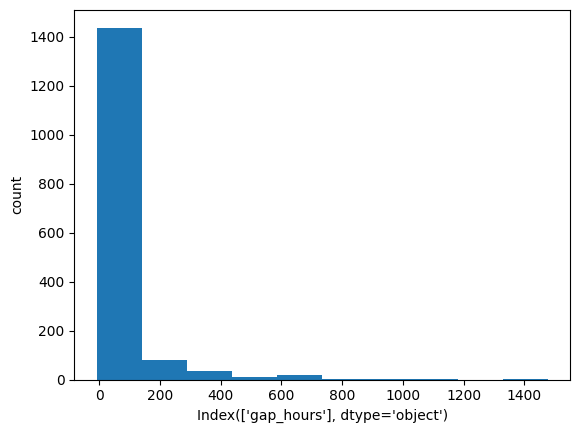

In [10]:
num_cols = ld.select_dtypes('number').columns
plt.hist(x=ld[num_cols])
plt.xlabel(num_cols)
plt.ylabel('count')

### Treating null values

In [11]:
ld.isna().sum()

vehicle_model_id         0
from_city_id           196
to_city_id               1
online_booking           0
mobile_site_booking      0
Car_Cancellation         0
season                   0
day_of_departure         0
hour_of_departure        0
gap_hours                0
area_cancel_per          0
dtype: int64

### from_city_id

In [12]:
area_id_grp=ld[ld['Car_Cancellation']==1].groupby(by='from_city_id',dropna=False).count()
area_id_grp['Car_Cancellation'].sort_values(ascending=False)

from_city_id
15.0    17
NaN      4
Name: Car_Cancellation, dtype: int64

In [13]:
row_1 = ((ld['Car_Cancellation']==1) & (ld['from_city_id'].isna()))
row_0 = ((ld['Car_Cancellation']==0) & (ld['from_city_id'].isna()))

ld.loc[row_1,'from_city_id']=ld.loc[row_1,'from_city_id'].fillna('15.0')

ld.loc[row_0,'from_city_id']=ld.loc[row_0,'from_city_id'].fillna('31.0')

### to_city_id

In [14]:
area_id_grp=ld[ld['Car_Cancellation']==1].groupby(by='to_city_id',dropna=False).count()
area_id_grp['Car_Cancellation'].sort_values(ascending=False)

to_city_id
32.0     8
29.0     4
131.0    2
51.0     1
56.0     1
69.0     1
108.0    1
113.0    1
146.0    1
191.0    1
Name: Car_Cancellation, dtype: int64

In [15]:
area_id_grp=ld[ld['Car_Cancellation']==0].groupby(by='to_city_id',dropna=False).count()
area_id_grp['Car_Cancellation'].sort_values(ascending=False)

to_city_id
32.0     467
55.0     174
29.0     112
146.0     88
108.0     63
        ... 
16.0       1
157.0      1
NaN        1
165.0      1
53.0       1
Name: Car_Cancellation, Length: 117, dtype: int64

In [16]:
row_0 = ((ld['Car_Cancellation']==0) & (ld['to_city_id'].isna()))

ld.loc[row_0,'to_city_id']=ld.loc[row_0,'to_city_id'].fillna(ld.to_city_id.mode()[0])

In [17]:
ld.isna().sum()

vehicle_model_id       0
from_city_id           0
to_city_id             0
online_booking         0
mobile_site_booking    0
Car_Cancellation       0
season                 0
day_of_departure       0
hour_of_departure      0
gap_hours              0
area_cancel_per        0
dtype: int64

### Model Selection

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

### Train_test_split

In [19]:
X_1=ld.drop(columns='Car_Cancellation')
Y_1 = ld['Car_Cancellation']
Y_1= Y_1.astype('int')

X_train_1 , X_test_1 , Y_train_1, Y_test_1 = train_test_split(X_1,Y_1,random_state=42,test_size=0.33,stratify=Y_1)

### Oversampling

In [20]:
sm = SMOTE(random_state=42)
X_train_over_1,Y_train_over_1 = sm.fit_resample(X=X_train_1,y=Y_train_1)

In [21]:
Y_train_over_1.value_counts()

Car_Cancellation
0    1050
1    1050
Name: count, dtype: int64

### Decision Tree

In [22]:
dt_1 = DecisionTreeClassifier(random_state=42)
param_grid_dt_1 = {'criterion':['gini', 'entropy', 'log_loss'],
                 'splitter':['best', 'random'],
                 'min_samples_split':[23,4,5,6,7,8,9,10,15,20],
                 'max_features':['sqrt', 'log2']
                }

gsv_dt_1 = GridSearchCV(dt_1,param_grid=param_grid_dt_1,scoring='f1',cv=20,n_jobs=3)

In [23]:
gsv_dt_1.fit(X=X_train_over_1,y=Y_train_over_1)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=42), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [23, 4, 5, 6, 7, 8, 9, 10, 15,
                                               20],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [24]:
gsv_dt_1.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'splitter': 'best'}

In [25]:
ypred_dt_1 = gsv_dt_1.predict(X=X_test_1)

In [26]:
print(classification_report(y_true= Y_test_1 , y_pred=ypred_dt_1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       518
           1       0.00      0.00      0.00         7

    accuracy                           0.97       525
   macro avg       0.49      0.49      0.49       525
weighted avg       0.97      0.97      0.97       525



### Random Forest

In [27]:
rf_1 =RandomForestClassifier(random_state=40)

In [28]:
param_dist_rf_1 = { 
              'min_samples_split':[2,4,6,8,9,10,20,30],
             'bootstrap':[True,False],
             'max_features':['sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf_1 = GridSearchCV(rf_1,cv=20,param_grid=param_dist_rf_1,n_jobs=3,scoring='f1')

In [29]:
cv_rf_1.fit(X_train_over_1,Y_train_over_1)

GridSearchCV(cv=20, estimator=RandomForestClassifier(random_state=40), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 4, 6, 8, 9, 10, 20, 30]},
             scoring='f1')

In [30]:
ypred_rf_1=cv_rf_1.predict(X_test_1)

In [31]:
print(classification_report(y_true= Y_test_1 , y_pred=ypred_rf_1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       518
           1       0.17      0.14      0.15         7

    accuracy                           0.98       525
   macro avg       0.58      0.57      0.57       525
weighted avg       0.98      0.98      0.98       525



# Travel_id_2

In [32]:
cwd = os.path.dirname(os.getcwd())
data_path_2 = os.path.join(cwd,'data','travel_id_2.csv')
ptp = pd.read_csv(data_path_2)

### changing datatype

In [33]:
# Changing the column dtypes to object
ptp[['id','user_id','vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id',
                                       'from_city_id','to_city_id','online_booking','hour_of_departure',
                                       'mobile_site_booking','from_lat','from_long','to_lat','to_long','season','day_of_departure',
                                       'area_cancel_per','Car_Cancellation']] = ptp[['id','user_id','vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id',
                                       'from_city_id','to_city_id','online_booking','hour_of_departure',
                                       'mobile_site_booking','from_lat','from_long','to_lat','to_long','season','day_of_departure',
                                       'area_cancel_per','Car_Cancellation']].astype('object')

# Changing the date to date column to appropiate data type
ptp[['from_date','booking_created']] = ptp[['from_date','booking_created']].astype('datetime64[s]')
# ptp['to_date'] = ptp['to_date'].astype('datetime64[s]')

ptp['gap_hours'] = ptp['gap_hours'].astype('float32')

In [34]:
ptp.isna().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             34292
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
from_date                  0
to_date                15185
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
season                     0
day_of_departure           0
hour_of_departure          0
gap_hours                  0
area_cancel_per            0
dtype: int64

In [35]:
ptp.Car_Cancellation.value_counts(dropna=False)

Car_Cancellation
0    31517
1     2775
Name: count, dtype: int64

In [36]:
ptp.nunique(dropna=False)

id                     34292
user_id                18292
vehicle_model_id          16
package_id                 1
travel_type_id             1
from_area_id             586
to_area_id               567
from_city_id               2
to_city_id                 1
from_date              18462
to_date                18420
online_booking             2
mobile_site_booking        2
booking_created        31200
from_lat                 458
from_long                454
to_lat                   449
to_long                  446
Car_Cancellation           2
season                     4
day_of_departure           7
hour_of_departure          4
gap_hours               6386
area_cancel_per            5
dtype: int64

### Calculating the distance

In [37]:
distance = []
from math import radians, degrees, sin, cos, asin, acos, sqrt

for i in range(ptp.shape[0]):
    lon1, lat1, lon2, lat2 = map(radians, [ptp['from_long'][i], ptp['from_lat'][i], ptp['to_long'][i], ptp['to_lat'][i]])
    distance.append(6371 * (acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2))))

In [38]:
ptp['distance'] = distance

### Dropping columns

In [39]:
ptp.drop(columns=['id','user_id','package_id','travel_type_id','from_area_id','from_city_id','to_city_id','from_date','to_date','booking_created','to_lat','to_long','from_lat','from_long'],inplace=True)

In [40]:
ptp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34292 entries, 0 to 34291
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     34292 non-null  object 
 1   to_area_id           34292 non-null  object 
 2   online_booking       34292 non-null  object 
 3   mobile_site_booking  34292 non-null  object 
 4   Car_Cancellation     34292 non-null  object 
 5   season               34292 non-null  object 
 6   day_of_departure     34292 non-null  object 
 7   hour_of_departure    34292 non-null  object 
 8   gap_hours            34292 non-null  float32
 9   area_cancel_per      34292 non-null  object 
 10  distance             34292 non-null  float64
dtypes: float32(1), float64(1), object(9)
memory usage: 2.7+ MB


### Distribution of object columns

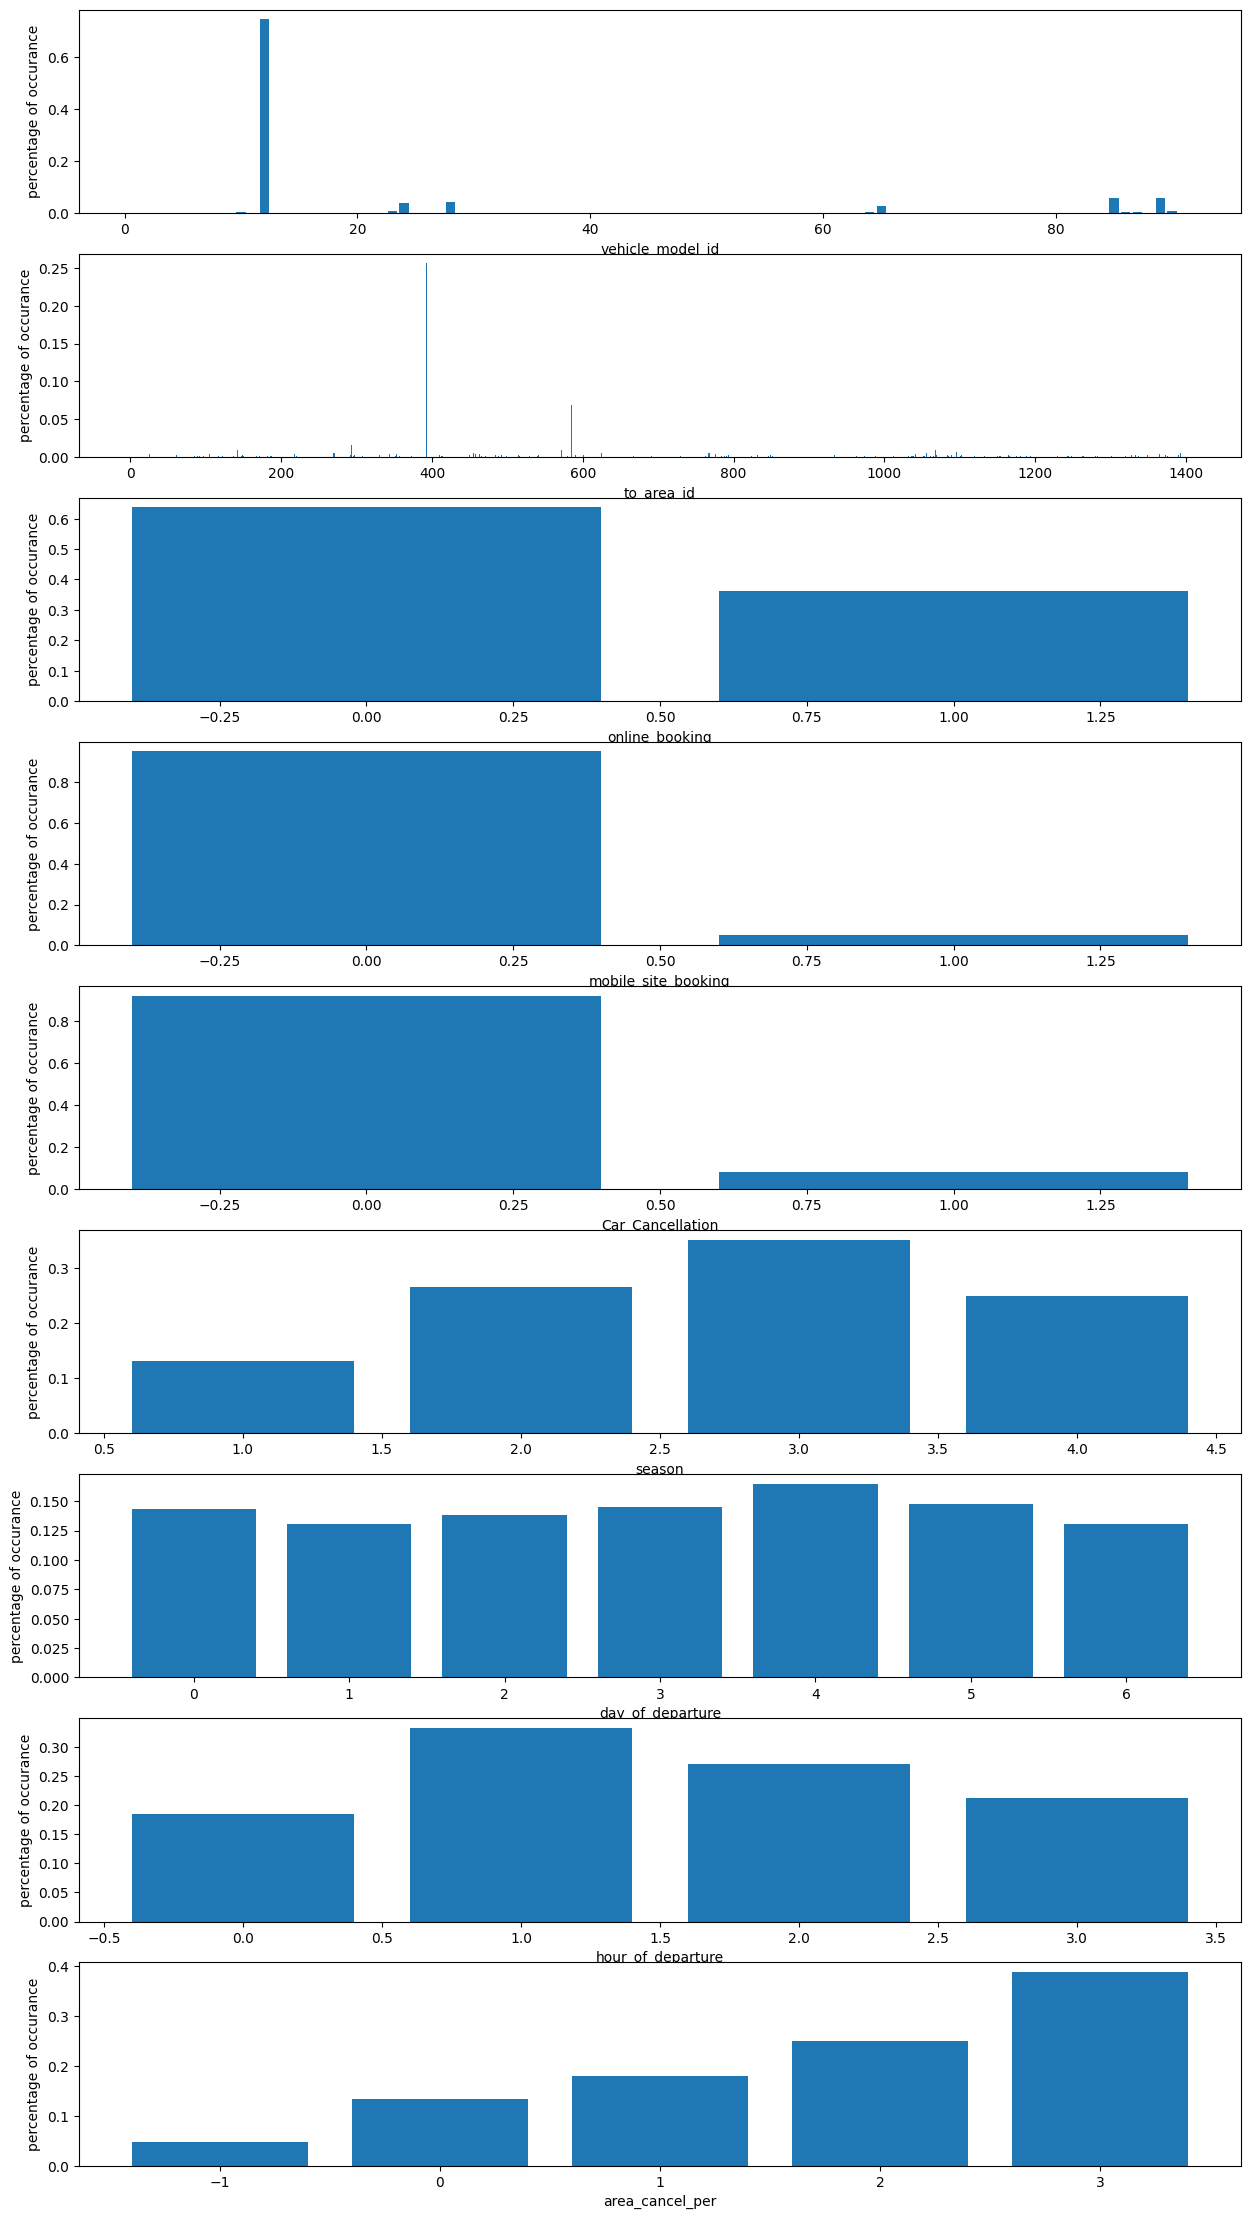

In [41]:
obj_cols = ptp.select_dtypes('object').columns

i=0
fig,ax = plt.subplots(9,1)
for i in range(9):
    ax[i].bar(x=ptp[obj_cols[i]].value_counts(normalize=True,dropna=True).keys(),height=ptp[obj_cols[i]].value_counts(normalize=True,dropna=True).values)
    ax[i].set_xlabel(obj_cols[i])
    ax[i].set_ylabel('percentage of occurance')

    i+=1
    
fig.set_size_inches(15,28)

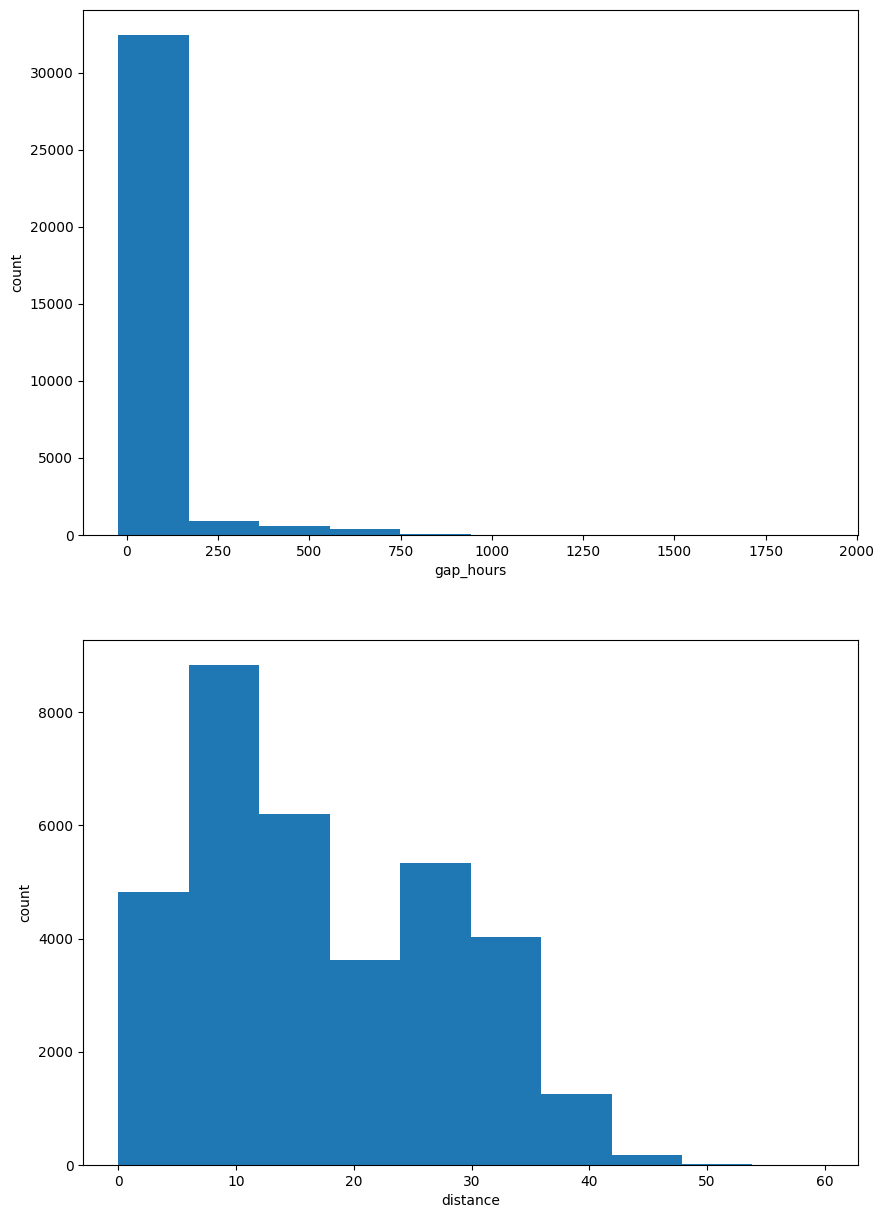

In [42]:
num_cols = ptp.select_dtypes('number').columns

i=0
fig,ax = plt.subplots(2,1)
for i in range(2):
    ax[i].hist(x=ptp[num_cols[i]])
    ax[i].set_xlabel(num_cols[i])
    ax[i].set_ylabel('count')

    i+=1
fig.set_size_inches(10,15)

### Treating null values

In [43]:
ptp.isna().sum()

vehicle_model_id       0
to_area_id             0
online_booking         0
mobile_site_booking    0
Car_Cancellation       0
season                 0
day_of_departure       0
hour_of_departure      0
gap_hours              0
area_cancel_per        0
distance               0
dtype: int64

### Model Selection

### Decision Tree

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
X_2=ptp.drop(columns='Car_Cancellation')
Y_2 = ptp['Car_Cancellation']
Y_2= Y_2.astype('int')


X_train_2 , X_test_2 , Y_train_2, Y_test_2 = train_test_split(X_2,Y_2,random_state=42,test_size=0.33,stratify=Y_2)

In [46]:
dt_2 = DecisionTreeClassifier(random_state=42)
param_grid_dt_2 = {'criterion':['gini', 'entropy', 'log_loss'],
                 'splitter':['best', 'random'],
                 'min_samples_split':[23,4,5,6,7,8,9,10,15,20],
                 'max_features':['sqrt', 'log2']
                }

gsv_dt_2 = GridSearchCV(dt_2,param_grid=param_grid_dt_2,scoring='f1',cv=20,n_jobs=3)

In [47]:
gsv_dt_2.fit(X=X_train_2,y=Y_train_2)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=42), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [23, 4, 5, 6, 7, 8, 9, 10, 15,
                                               20],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [48]:
gsv_dt_2.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 9,
 'splitter': 'best'}

In [49]:
ypred_dt_2 = gsv_dt_2.predict(X_test_2)
print(classification_report(y_true= Y_test_2 , y_pred=ypred_dt_2))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10401
           1       0.36      0.27      0.30       916

    accuracy                           0.90     11317
   macro avg       0.65      0.61      0.63     11317
weighted avg       0.89      0.90      0.90     11317



### Random Forest

In [50]:
rf_2 =RandomForestClassifier(random_state=40)

In [51]:
param_dist_rf_2 = { 
              'min_samples_split':[2,4,6,8,9,10,20,30],
             'bootstrap':[True,False],
             'max_features':['sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf_2 = GridSearchCV(rf_2,cv=20,param_grid=param_dist_rf_2,n_jobs=3,scoring='f1')

In [52]:
cv_rf_2.fit(X_train_2,Y_train_2)

GridSearchCV(cv=20, estimator=RandomForestClassifier(random_state=40), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 4, 6, 8, 9, 10, 20, 30]},
             scoring='f1')

In [53]:
ypred_rf_2=cv_rf_2.predict(X_test_2)

In [54]:
print(classification_report(y_true= Y_test_2 , y_pred=ypred_rf_2))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10401
           1       0.55      0.26      0.35       916

    accuracy                           0.92     11317
   macro avg       0.74      0.62      0.65     11317
weighted avg       0.91      0.92      0.91     11317



# Travel_id = 3

In [55]:
cwd = os.path.dirname(os.getcwd())
data_path_hr = os.path.join(cwd,'data','travel_id_3.csv')
hr = pd.read_csv(data_path_hr)

### Changing dtypes of train

In [56]:
# Changing the column dtypes to object
hr[['id','user_id','vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id',
                                       'from_city_id','to_city_id','online_booking','hour_of_departure',
                                       'mobile_site_booking','from_lat','from_long','to_lat','to_long','season','day_of_departure',
                                       'area_cancel_per','Car_Cancellation']] = hr[['id','user_id','vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id',
                                       'from_city_id','to_city_id','online_booking','hour_of_departure',
                                       'mobile_site_booking','from_lat','from_long','to_lat','to_long','season','day_of_departure',
                                       'area_cancel_per','Car_Cancellation']].astype('object')

# Changing the date to date column to appropiate data type
hr[['from_date','booking_created']] = hr[['from_date','booking_created']].astype('datetime64[s]')
hr['to_date'] = hr['to_date'].astype('datetime64[s]')

hr['gap_hours'] = hr['gap_hours'].astype('float32')

### Counting number of missing values for each field

In [57]:
hr.isna().sum()

id                        0
user_id                   0
vehicle_model_id          0
package_id                0
travel_type_id            0
from_area_id              0
to_area_id             7550
from_city_id           7102
to_city_id             7550
from_date                 0
to_date                2620
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  0
from_long                 0
to_lat                 7550
to_long                7550
Car_Cancellation          0
season                    0
day_of_departure          0
hour_of_departure         0
gap_hours                 0
area_cancel_per           0
dtype: int64

### Checking Value count of Target variable

In [58]:
hr.Car_Cancellation.value_counts(dropna=False)

Car_Cancellation
0    7214
1     336
Name: count, dtype: int64

### Checking number of unique values of each feature

In [59]:
hr.nunique(dropna=False)

id                     7550
user_id                4484
vehicle_model_id         20
package_id                7
travel_type_id            1
from_area_id            482
to_area_id                1
from_city_id              2
to_city_id                1
from_date              5652
to_date                3412
online_booking            2
mobile_site_booking       2
booking_created        7316
from_lat                398
from_long               395
to_lat                    1
to_long                   1
Car_Cancellation          2
season                    4
day_of_departure          7
hour_of_departure         4
gap_hours              2002
area_cancel_per           5
dtype: int64

### Dropping Columns

In [60]:
hr.drop(columns=['id','user_id','travel_type_id','from_area_id','to_area_id','from_city_id','to_city_id','from_date','to_date','booking_created','to_lat','to_long','from_lat','from_long'],inplace=True)

In [61]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7550 entries, 0 to 7549
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     7550 non-null   object 
 1   package_id           7550 non-null   object 
 2   online_booking       7550 non-null   object 
 3   mobile_site_booking  7550 non-null   object 
 4   Car_Cancellation     7550 non-null   object 
 5   season               7550 non-null   object 
 6   day_of_departure     7550 non-null   object 
 7   hour_of_departure    7550 non-null   object 
 8   gap_hours            7550 non-null   float32
 9   area_cancel_per      7550 non-null   object 
dtypes: float32(1), object(9)
memory usage: 560.5+ KB


### Plotting the percentage of occurance of values in each object column

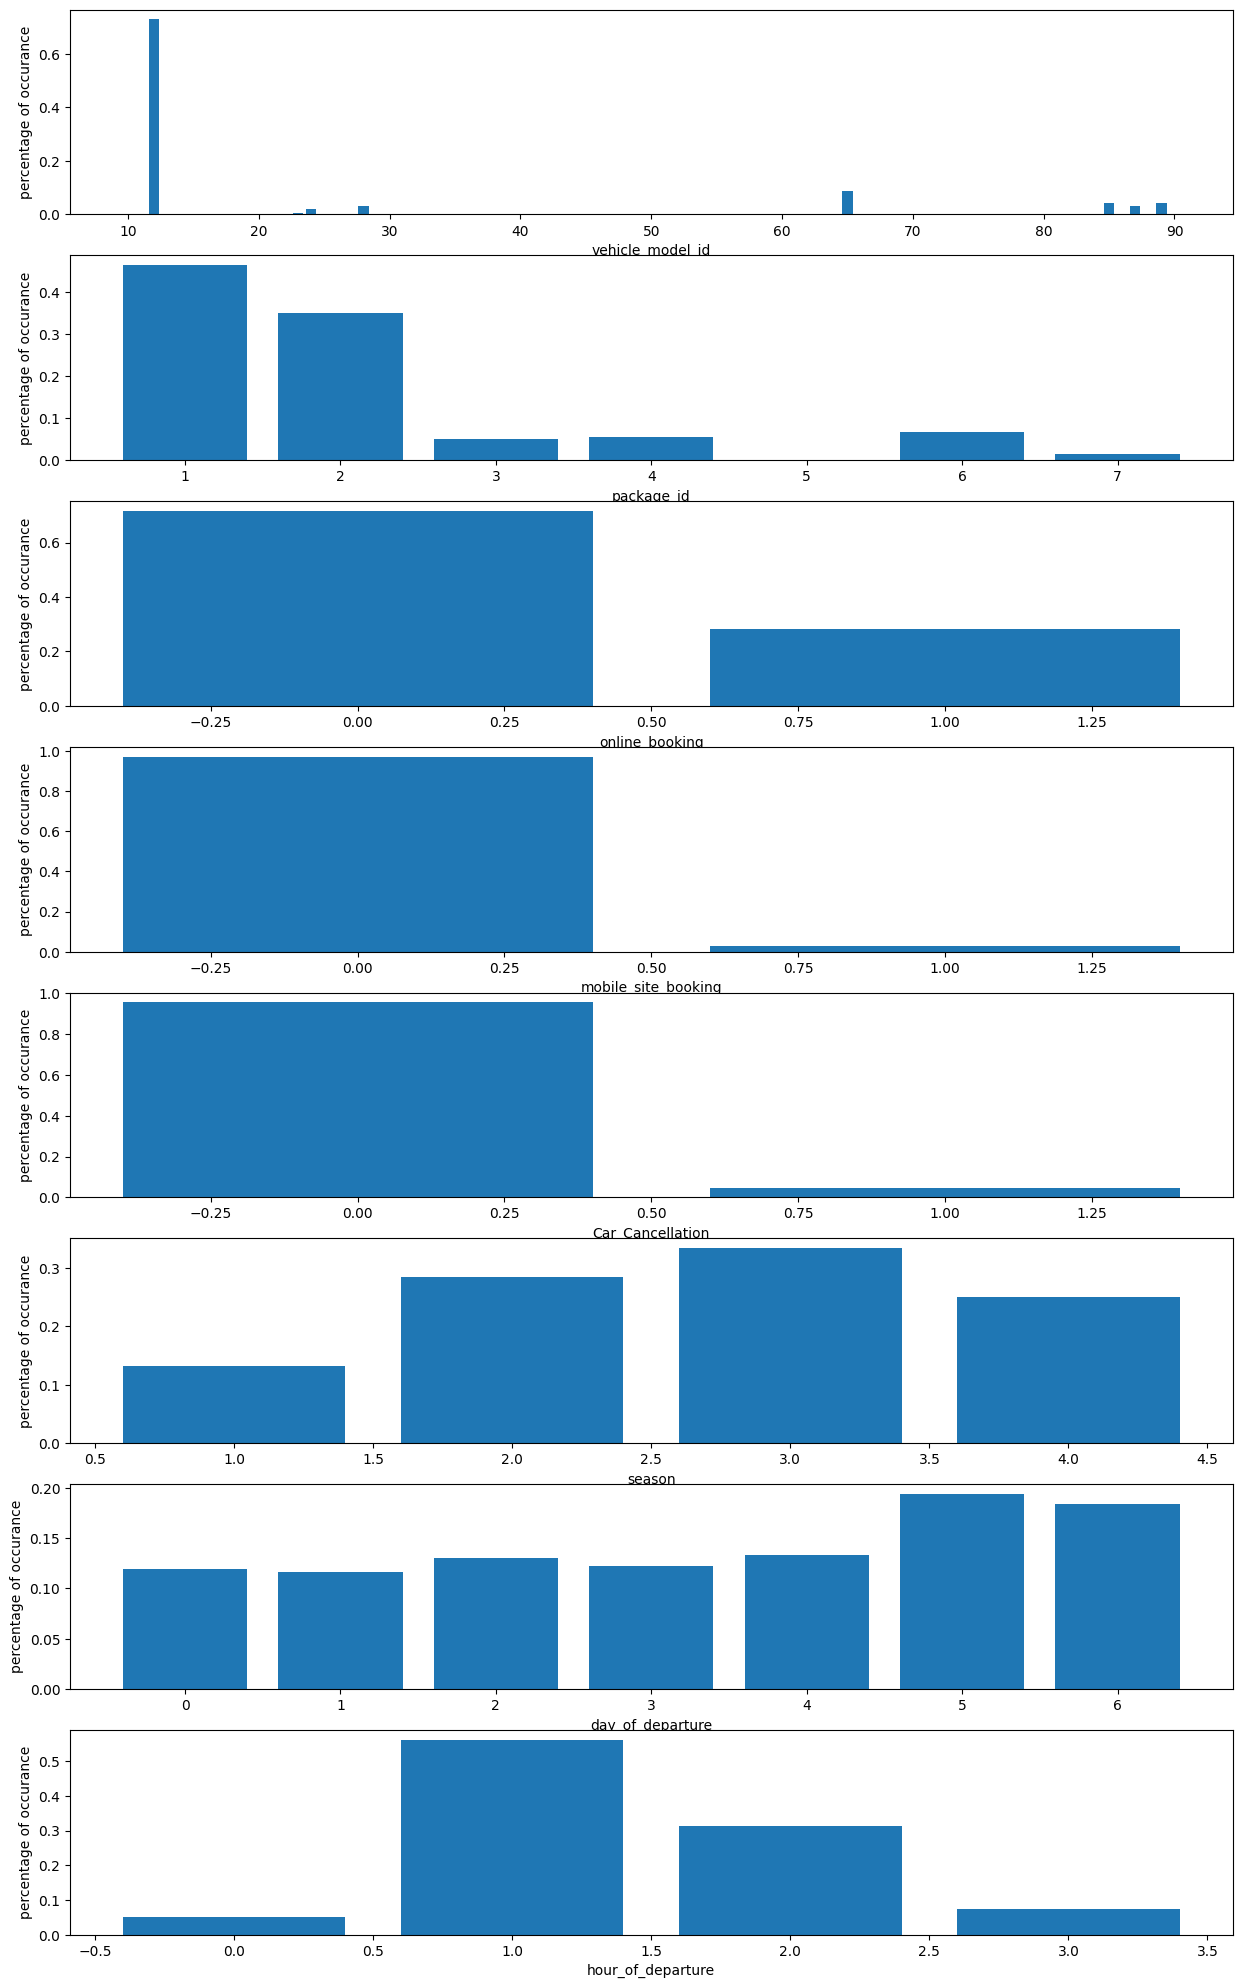

In [62]:
obj_cols = hr.select_dtypes('object').columns

i=0
fig,ax = plt.subplots(8,1)
for i in range(8):
    ax[i].bar(x=hr[obj_cols[i]].value_counts(normalize=True,dropna=True).keys(),height=hr[obj_cols[i]].value_counts(normalize=True,dropna=True).values)
    ax[i].set_xlabel(obj_cols[i])
    ax[i].set_ylabel('percentage of occurance')

    i+=1
    
fig.set_size_inches(15,25)

### Distribution of Numeric columns

Text(0, 0.5, 'count')

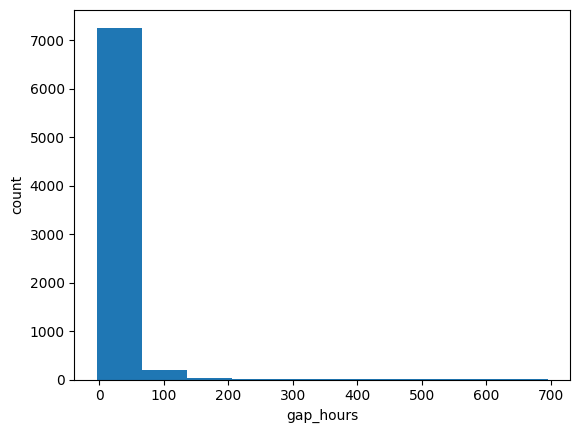

In [63]:
num_cols = hr.select_dtypes('number').columns
plt.hist(x=hr[num_cols])
plt.xlabel(num_cols.values[0])
plt.ylabel('count')

### Treating null values

In [64]:
hr.isna().sum()

vehicle_model_id       0
package_id             0
online_booking         0
mobile_site_booking    0
Car_Cancellation       0
season                 0
day_of_departure       0
hour_of_departure      0
gap_hours              0
area_cancel_per        0
dtype: int64

### Model Selection

In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

### Train_test_split

In [66]:
X_3=hr.drop(columns='Car_Cancellation')
Y_3 = hr['Car_Cancellation']
Y_3= Y_3.astype('int')


X_train_3 , X_test_3 , Y_train_3, Y_test_3 = train_test_split(X_3,Y_3,random_state=42,test_size=0.33,stratify=Y_3)

### Oversampling

In [67]:
sm = SMOTE(random_state=42)
X_train_over_3,Y_train_over_3 = sm.fit_resample(X=X_train_3,y=Y_train_3)

In [68]:
Y_train_over_3.value_counts()

Car_Cancellation
0    4833
1    4833
Name: count, dtype: int64

### Decision Tree

In [69]:
dt_3 = DecisionTreeClassifier(random_state=42)
param_grid_dt_3 = {'criterion':['gini', 'entropy', 'log_loss'],
                 'splitter':['best', 'random'],
                 'min_samples_split':[23,4,5,6,7,8,9,10,15,20],
                 'max_features':['sqrt', 'log2']
                }

gsv_dt_3 = GridSearchCV(dt_3,param_grid=param_grid_dt_3,scoring='f1',cv=20,n_jobs=6)

In [70]:
gsv_dt_3.fit(X=X_train_over_3 , y=Y_train_over_3 )

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=42), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [23, 4, 5, 6, 7, 8, 9, 10, 15,
                                               20],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [71]:
gsv_dt_3.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'splitter': 'best'}

In [72]:
ypred_dt_3 = gsv_dt_3.predict(X= X_test_3 )

In [73]:
print(classification_report(y_true= Y_test_3 , y_pred= ypred_dt_3 ))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2381
           1       0.20      0.17      0.18       111

    accuracy                           0.93      2492
   macro avg       0.58      0.57      0.57      2492
weighted avg       0.93      0.93      0.93      2492



### Random Forest

In [74]:
rf_3 =RandomForestClassifier(random_state=40)

In [75]:
param_dist_rf_3 = { 
              'min_samples_split':[2,4,6,8,9,10,20,30],
             'bootstrap':[True,False],
             'max_features':['sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf_3 = GridSearchCV(rf_3,cv=20,param_grid=param_dist_rf_3,n_jobs=3,scoring='f1')

In [76]:
cv_rf_3.fit(X_train_over_3, Y_train_over_3 )

GridSearchCV(cv=20, estimator=RandomForestClassifier(random_state=40), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 4, 6, 8, 9, 10, 20, 30]},
             scoring='f1')

In [77]:
ypred_rf_3 =cv_rf_3.predict(X_test_3)

In [78]:
print(classification_report(y_true= Y_test_3 , y_pred=ypred_rf_3))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2381
           1       0.40      0.19      0.26       111

    accuracy                           0.95      2492
   macro avg       0.68      0.59      0.62      2492
weighted avg       0.94      0.95      0.94      2492

